In [1]:
# pip install -U seaborn

In [84]:
# Import libraries
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model
from sklearn import ensemble

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_csv("Datasets/final-stock-dataset-with-sentiment-polarity-subjectivity.csv", index_col=0)
df.head()

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0


In [6]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


In [7]:
# df.to_csv("stock-dataset-with-sentiment-polarity-subjectivity.csv")

In [8]:
# df.set_index("Date", inplace=True)
# df.head()

In [9]:
df['Ltp'].dtypes

dtype('float64')

In [10]:
#null value check
df.isna().sum()

Open                      0
High                      0
Low                       0
Qty                       0
Turnover                  0
economic-subjectivity     0
economic-polarity         0
political-subjectivity    0
political-polarity        0
Ltp                       0
dtype: int64

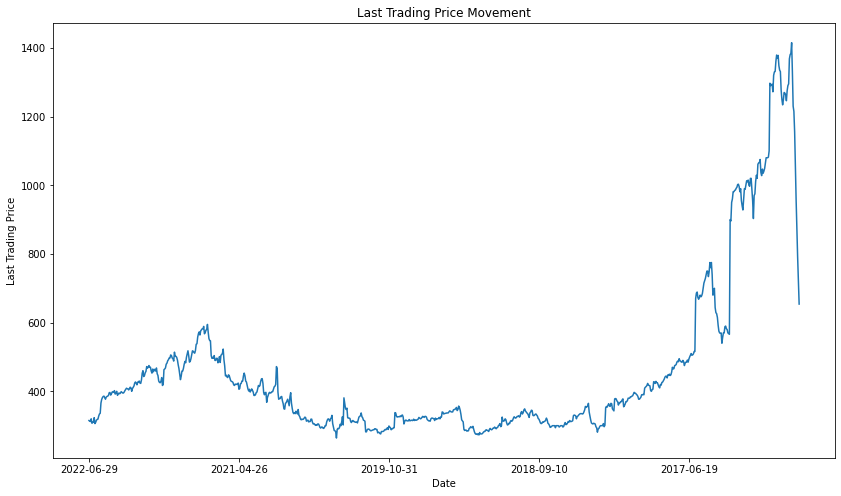

In [11]:
df['Ltp'].plot(figsize=(14,8))
plt.ylabel("Last Trading Price")
plt.title("Last Trading Price Movement")
plt.show()

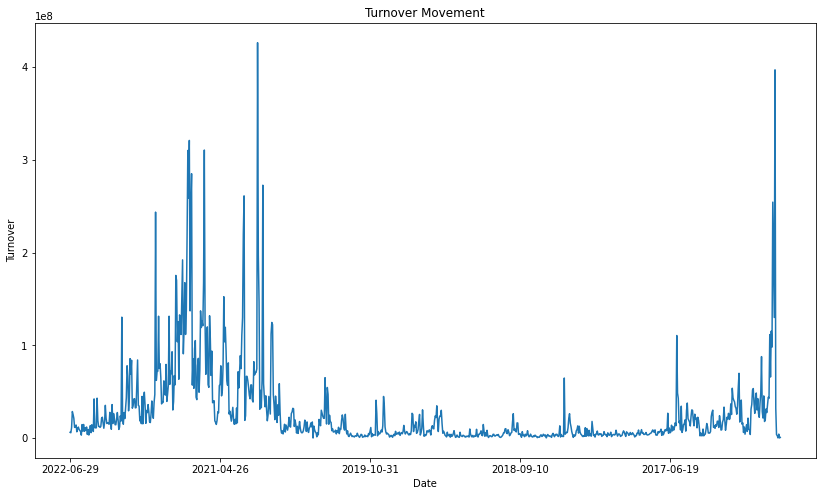

In [12]:
df['Turnover'].plot(figsize=(14,8))
plt.ylabel("Turnover")
plt.title("Turnover Movement")
plt.show()

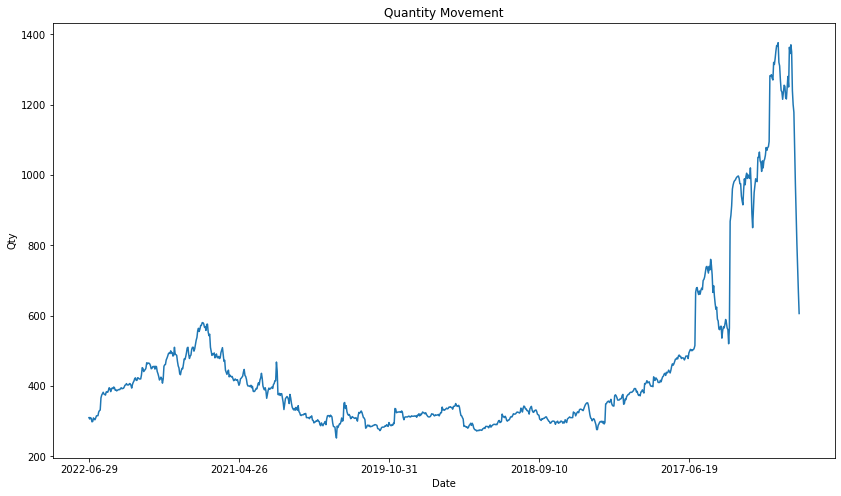

In [13]:
df['Qty'].plot(figsize=(14,8))
plt.ylabel("Qty")
plt.title("Quantity Movement")
plt.show()

In [14]:
df['Ltp'].value_counts()

300.0    19
315.0    12
320.0    12
314.0    11
312.0    11
         ..
388.3     1
350.0     1
357.0     1
396.6     1
654.0     1
Name: Ltp, Length: 383, dtype: int64

In [15]:
# # Paiplot of  dataframe
# sns.pairplot(df, hue = 'Ltp')

In [16]:
## Make correlation matrix 

df.corr()

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Open,1.000000,0.999023,0.999335,0.999335,0.249468,0.007509,0.148061,0.001911,0.008607,0.998562
High,0.999023,1.000000,0.999134,0.999134,0.259375,0.006479,0.150168,0.002528,0.009023,0.999587
Low,0.999335,0.999134,1.000000,1.000000,0.246582,0.004674,0.147470,0.002132,0.008001,0.999251
Qty,0.999335,0.999134,1.000000,1.000000,0.246582,0.004674,0.147470,0.002132,0.008001,0.999251
Turnover,0.249468,0.259375,0.246582,0.246582,1.000000,0.002024,0.010022,-0.006702,0.039462,0.253623
economic-subjectivity,0.007509,0.006479,0.004674,0.004674,0.002024,1.000000,0.234261,0.029147,0.012509,0.006837
economic-polarity,0.148061,0.150168,0.147470,0.147470,0.010022,0.234261,1.000000,0.025870,-0.029237,0.150450
political-subjectivity,0.001911,0.002528,0.002132,0.002132,-0.006702,0.029147,0.025870,1.000000,0.231214,0.003092
political-polarity,0.008607,0.009023,0.008001,0.008001,0.039462,0.012509,-0.029237,0.231214,1.000000,0.009975
Ltp,0.998562,0.999587,0.999251,0.999251,0.253623,0.006837,0.150450,0.003092,0.009975,1.000000


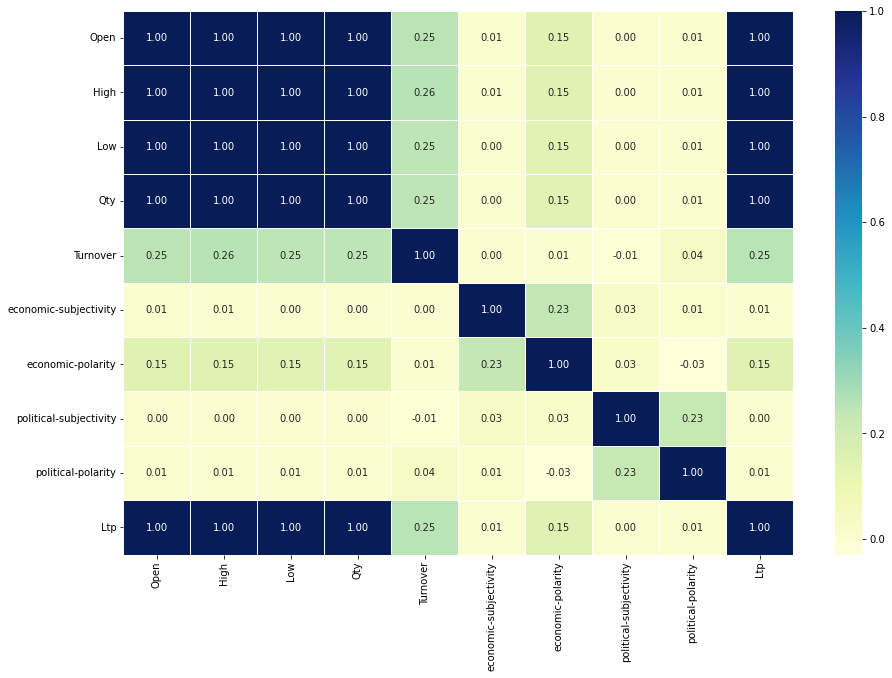

In [17]:
## making correlation matrix more understable 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu",);

# Summary Statistics and Visualize of Economic Text

In [18]:
#Statistics of Economic Text Subjectivity
df['economic-subjectivity'].describe()


count    948.000000
mean       0.320811
std        0.176394
min        0.000000
25%        0.200000
50%        0.315757
75%        0.439015
max        1.000000
Name: economic-subjectivity, dtype: float64

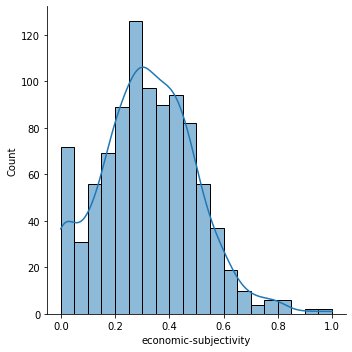

In [19]:
sns.displot(df['economic-subjectivity'], bins=20, kde=True);

In [20]:
#Statistics of Economic Text Polarity
df['economic-polarity'].describe()

count    948.000000
mean       0.059365
std        0.141399
min       -0.600000
25%       -0.006184
50%        0.050000
75%        0.136552
max        1.000000
Name: economic-polarity, dtype: float64

In [21]:
#Statistics of Economic Text Polarity
df['economic-polarity'].value_counts()

 0.000000    104
 0.050000     23
 0.100000     22
 0.250000     17
 0.200000     12
            ... 
-0.015000      1
-0.150000      1
 0.304167      1
 0.006667      1
 0.166369      1
Name: economic-polarity, Length: 523, dtype: int64

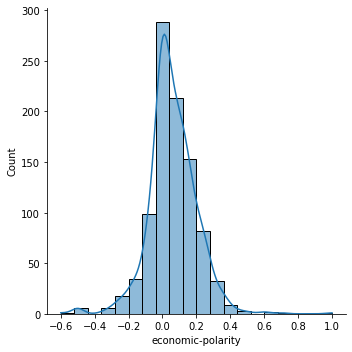

In [22]:
sns.displot(df['economic-polarity'], bins=20, kde=True);

In [23]:
#Statistics of Political Text Subjectivity
df['political-subjectivity'].describe()


count    948.000000
mean       0.307988
std        0.198543
min        0.000000
25%        0.175000
50%        0.300000
75%        0.428417
max        1.000000
Name: political-subjectivity, dtype: float64

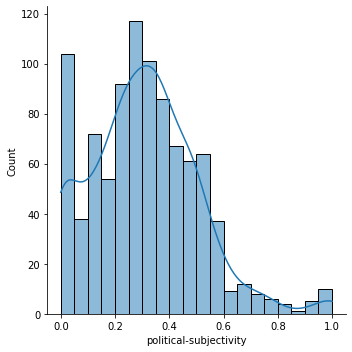

In [24]:
sns.displot(df['political-subjectivity'], bins=20, kde=True);

In [25]:
#Statistics of Political Text Polarity
df['political-polarity'].describe()

count    948.000000
mean       0.044399
std        0.137091
min       -0.650000
25%       -0.004505
50%        0.027435
75%        0.110278
max        0.600000
Name: political-polarity, dtype: float64

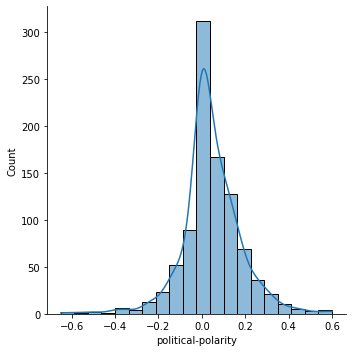

In [26]:
sns.displot(df['political-polarity'], bins=20, kde=True);

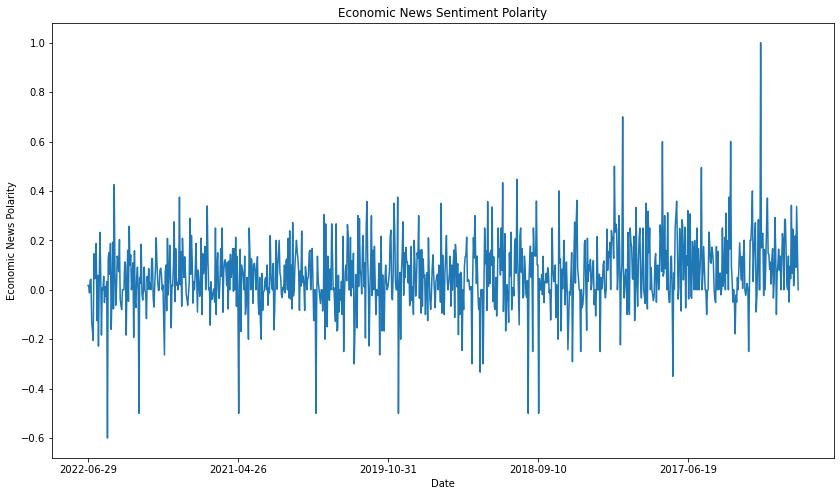

In [27]:
df['economic-polarity'].plot(figsize=(14,8))
plt.ylabel("Economic News Polarity")
plt.title("Economic News Sentiment Polarity")
plt.show()

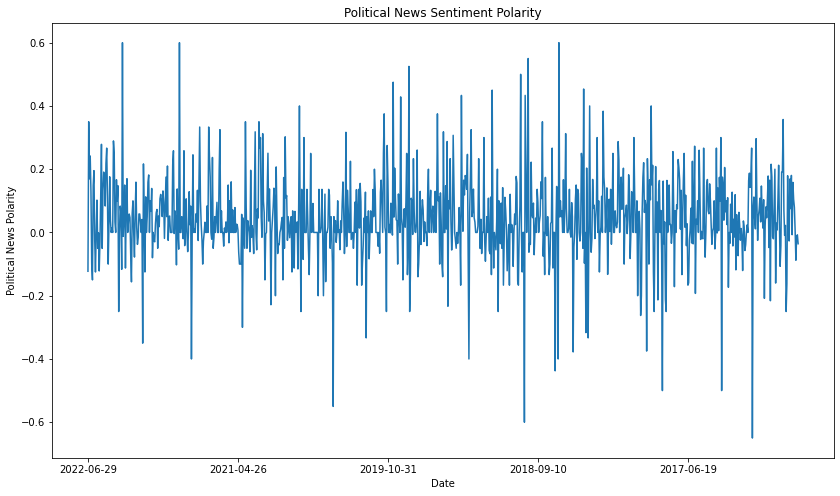

In [28]:
df['political-polarity'].plot(figsize=(14,8))
plt.ylabel("Political News Polarity")
plt.title("Political News Sentiment Polarity")
plt.show()


In [29]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


In [30]:
df.columns

Index(['Open', 'High', 'Low', 'Qty', 'Turnover', 'economic-subjectivity',
       'economic-polarity', 'political-subjectivity', 'political-polarity',
       'Ltp'],
      dtype='object')

In [31]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


In [32]:
df.head()

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0


In [33]:
df.iloc[:, 0:9]

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity
Date,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788
...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987


In [34]:
df.iloc[:, 9]

Date
2022-06-29    315.0
2022-06-28    313.0
2022-06-27    312.0
2022-06-26    320.0
2022-06-24    307.0
              ...  
2016-07-17    955.0
2016-07-14    869.0
2016-07-13    790.0
2016-07-12    719.0
2016-07-11    654.0
Name: Ltp, Length: 948, dtype: float64

In [35]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


In [36]:
# Create feature data set
X = df
X = np.array(X.drop(['Ltp'], 1))

# Create target data set
y = np.array(df['Ltp'])

In [37]:
X.shape

(948, 9)

In [38]:
y.shape

(948,)

# Lets split the data into 5 folds. 

In [143]:
# Lets split the data into 5 folds.  
kf5 =KFold(n_splits=5, shuffle=True, random_state=42)


count = 1
for train_index5, test_index5 in kf5.split(X, y):
    print(f'Fold:{count}, Train set: {len(train_index5)}, Test set:{len(test_index5)}')
    count += 1

Fold:1, Train set: 758, Test set:190
Fold:2, Train set: 758, Test set:190
Fold:3, Train set: 758, Test set:190
Fold:4, Train set: 759, Test set:189
Fold:5, Train set: 759, Test set:189


In [144]:
# X_train5 = train_index5.reshape(-1,1)
# y_train5 = train_index5.reshape(-1,1)


# X_test5 = test_index5.reshape(-1,1)
# y_test5 = test_index5.reshape(-1,1)

# Lets split the data into 10 folds.

In [145]:
X

array([[ 3.18900000e+02,  3.18900000e+02,  3.10000000e+02, ...,
         1.75000000e-02,  4.60909091e-01, -1.22727273e-01],
       [ 3.12000000e+02,  3.16500000e+02,  3.06000000e+02, ...,
         1.77777778e-02,  4.25000000e-01,  3.50000000e-01],
       [ 3.22000000e+02,  3.25000000e+02,  3.10000000e+02, ...,
        -1.25000000e-02,  4.57792208e-01,  1.69480519e-01],
       ...,
       [ 7.19000000e+02,  7.90000000e+02,  7.33000000e+02, ...,
         3.37121212e-01,  4.44805195e-01, -1.29870130e-02],
       [ 6.54000000e+02,  7.19000000e+02,  6.67000000e+02, ...,
         1.66369048e-01,  3.43232323e-01, -7.47474747e-03],
       [ 5.95000000e+02,  6.54000000e+02,  6.06000000e+02, ...,
         0.00000000e+00,  2.77380952e-01, -3.57142857e-02]])

In [146]:
y

array([ 315. ,  313. ,  312. ,  320. ,  307. ,  310. ,  309.7,  323.3,
        306. ,  310. ,  316. ,  318. ,  319. ,  328. ,  334. ,  336. ,
        366. ,  376.6,  382. ,  385. ,  386. ,  382. ,  377. ,  383. ,
        385. ,  386.1,  388. ,  396. ,  396.6,  389. ,  393. ,  398. ,
        399. ,  397. ,  402. ,  392. ,  395. ,  400. ,  388.3,  392. ,
        395. ,  393. ,  395. ,  399. ,  397. ,  395. ,  395. ,  398. ,
        402.2,  405.5,  409. ,  408. ,  406.7,  404. ,  408. ,  412. ,
        410. ,  400. ,  408. ,  411.5,  415.5,  424. ,  427.3,  423.9,
        419. ,  427. ,  425.9,  430. ,  424. ,  423. ,  433. ,  452.6,
        460. ,  443. ,  445.8,  454. ,  458. ,  472. ,  467.5,  470. ,
        475. ,  470. ,  470. ,  459. ,  453. ,  464.7,  457. ,  464. ,
        463. ,  459. ,  468. ,  451.1,  446.1,  430.1,  426. ,  425. ,
        429. ,  440. ,  417. ,  420. ,  463. ,  465. ,  468. ,  479. ,
        482. ,  489. ,  492.1,  497.1,  497. ,  506. ,  504. ,  497. ,
      

In [147]:
#split the data into 10 folds.  
kf10 =KFold(n_splits=10, shuffle=True, random_state=42)


count = 1
for train_index10, test_index10 in kf10.split(X, y):
    print(f'Fold:{count}, Train set: {len(train_index10)}, Test set:{len(test_index10)}')
    count += 1

Fold:1, Train set: 853, Test set:95
Fold:2, Train set: 853, Test set:95
Fold:3, Train set: 853, Test set:95
Fold:4, Train set: 853, Test set:95
Fold:5, Train set: 853, Test set:95
Fold:6, Train set: 853, Test set:95
Fold:7, Train set: 853, Test set:95
Fold:8, Train set: 853, Test set:95
Fold:9, Train set: 854, Test set:94
Fold:10, Train set: 854, Test set:94


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=0)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((853, 9), (95, 9), (853,), (95,))

In [57]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Modeling

In [87]:
models = {"LinearRegression":LinearRegression(),
          "MLPRegressor": MLPRegressor(),
          "SVM":SVR(),
          'Ridge': Ridge(),
          "KNN":KNeighborsRegressor(),
          "RandomForestRegressor":RandomForestRegressor(),
        }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [88]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [89]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

# Model Comparison

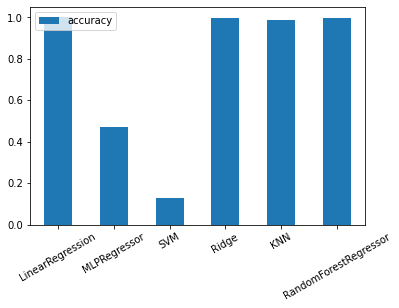

In [90]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=30, horizontalalignment='center');

# Hyperparameter Tuning

In [96]:
param_regr = {
    'fit_intercept': ['True','False'],
    'positive': ['True','False'],
}

param_mlp = {
    'hidden_layer_sizes': (150,100,50),
     'max_iter' : [100,200,300,500,1000],
     'activation' : ['relu','identity', 'logistic', 'tanh'],
     'solver' : ['adam','lbfgs','sgd'],
     'validation_fraction': np.arange(0.0,1.0)
}

param_svm = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear', 'poly', 'sigmoid']
    }

param_ridge = {
    'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]
}

param_knn ={
    'leaf_size':np.arange(1,50),
    'n_neighbors':np.arange(1,30),
    'p':[1,2]
}

param_rf = {
    'n_estimators': [20, 50, 100, 500, 1000],  
    'max_depth': np.arange(1, 15, 1),  
    'min_samples_split': [2, 10, 9], 
    'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
    'bootstrap': [True, False], 
    'random_state': [1, 2, 30, 42]
}

# Tune Linear Regression

In [101]:
np.random.seed(42)

# Setup random hyperparameter search for LinearRegression
regr = RandomizedSearchCV(LinearRegression(),
                                param_distributions=param_regr,
                                cv=10,
                                n_iter=10,
                                verbose=True,
                                n_jobs=-1)

#Fit random hyperparameter search model for LinearRegression 
regr.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


RandomizedSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': ['True', 'False'],
                                        'positive': ['True', 'False']},
                   verbose=True)

In [102]:
# Find the best parameters
regr.best_params_


{'positive': 'True', 'fit_intercept': 'True'}

In [103]:
# Evaluate the randomized search LinearRegression Model
regr.score(X_test, y_test)

0.9995277693197183

In [123]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

# Tune Multi Layer Perceptron Regressor

In [108]:
np.random.seed(42)

# Setup random hyperparameter search for MLPRegressor
mlp = RandomizedSearchCV(MLPRegressor(),
                         param_distributions=param_mlp,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for MLPRegressor 
mlp.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'identity',
                                                       'logistic', 'tanh'],
                                        'hidden_layer_sizes': (150, 100, 50),
                                        'max_iter': [100, 200, 300, 500, 1000],
                                        'solver': ['adam', 'lbfgs', 'sgd'],
                                        'validation_fraction': array([0.])},
                   verbose=True)

In [109]:
# Find the best parameters
mlp.best_params_

{'validation_fraction': 0.0,
 'solver': 'lbfgs',
 'max_iter': 200,
 'hidden_layer_sizes': 100,
 'activation': 'relu'}

In [110]:
# Evaluate the randomized search MLPRegressor Model
mlp.score(X_test, y_test)

0.9997198317611198

In [124]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

# Tune Support Vector Machine Regressor

In [111]:
np.random.seed(42)

# Setup random hyperparameter search for SVM
svm = RandomizedSearchCV(SVR(),
                         param_distributions=param_svm,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for SVM 
svm.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=True)

In [112]:
# Find the best parameters
svm.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 10}

In [113]:
# Evaluate the randomized search SVM Model
svm.score(X_test, y_test)

0.9992021265020243

In [125]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

# Tune Ridge

In [115]:
np.random.seed(42)

# Setup random hyperparameter search for Ridge Rigressor
ridge = RandomizedSearchCV(Ridge(),
                         param_distributions=param_ridge,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for Ridge Rigressor 
ridge.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [200, 230, 250, 265, 270, 275,
                                                  290, 300, 500]},
                   verbose=True)

In [116]:
# Find the best parameters
ridge.best_params_

{'alpha': 200}

In [117]:
# Evaluate the randomized search SVM Model
ridge.score(X_test, y_test)

0.9949215559562942

In [126]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

# Tune KNeighborsRegressor

In [133]:
np.random.seed(42)

# Setup random hyperparameter search for Ridge Rigressor
knn = RandomizedSearchCV(KNeighborsRegressor(),
                         param_distributions=param_knn,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for Ridge Rigressor 
knn.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   verbose=True)

In [134]:
# Find the best parameters
knn.best_params_

{'p': 1, 'n_neighbors': 8, 'leaf_size': 29}

In [135]:
# Evaluate the randomized search SVM Model
knn.score(X_test, y_test)

0.9952103114281033

In [136]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

# Tune random Forest Regressor

In [137]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestRegressor
rf = RandomizedSearchCV(RandomForestRegressor(),
                         param_distributions=param_rf,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for RandomForestRegressor 
rf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': [2, 10, 9],
                                        'n_estimators': [20, 50, 100, 500,
                                                         1000],
                                        'random_state': [1, 2, 30, 42]},
                   verbose=True)

In [138]:
# Find the best parameters
rf.best_params_

{'random_state': 30,
 'n_estimators': 1000,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_depth': 14,
 'bootstrap': True}

In [139]:
# Evaluate the randomized search RandomForestRegressor Model
rf.score(X_test, y_test)

0.9983388314552286

In [140]:
model_scores

{'LinearRegression': 0.9997725365098407,
 'MLPRegressor': 0.4718559727984556,
 'SVM': 0.1302051469356421,
 'Ridge': 0.999429140813715,
 'KNN': 0.9870351389950535,
 'RandomForestRegressor': 0.9984759002111709}

In [142]:
# test models
models = {  'LinearRegression':LinearRegression(positive= 'True', fit_intercept= 'True'),
            'MLPRegressor': MLPRegressor(validation_fraction= 0.0,solver= 'lbfgs',max_iter= 200,
                                         hidden_layer_sizes= 100, activation='relu'),
            'SVM': SVR(kernel= 'linear', gamma= 0.001, C=10),
            'Ridge':Ridge(alpha= 200),
            'KNN': KNeighborsRegressor(p= 1, n_neighbors= 8, leaf_size= 29),
            'RandomForestRegressor': RandomForestRegressor(random_state= 30, n_estimators=1000, min_samples_split= 9,
                                                           min_samples_leaf= 3, max_depth= 14, bootstrap=True)
            }

for model_name in models.keys():

    model = models[model_name]
    print('\n'+'--------------',model_name,'---------------'+'\n')
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using {model_name}.')
    errors = abs(predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')


-------------- LinearRegression ---------------

Mean Absolute Error: 3.8249
Mean Squared Error: 32.8464
Root Mean Squared Error: 5.7312
(R^2) Score: 0.9995
Train Score : 99.93% and Test Score : 99.95% using LinearRegression.
Accuracy: 99.2 %.

-------------- MLPRegressor ---------------

Mean Absolute Error: 2.8725
Mean Squared Error: 15.6547
Root Mean Squared Error: 3.9566
(R^2) Score: 0.9998
Train Score : 99.96% and Test Score : 99.98% using MLPRegressor.
Accuracy: 99.38 %.

-------------- SVM ---------------

Mean Absolute Error: 4.1362
Mean Squared Error: 55.4967
Root Mean Squared Error: 7.4496
(R^2) Score: 0.9992
Train Score : 99.91% and Test Score : 99.92% using SVM.
Accuracy: 99.22 %.

-------------- Ridge ---------------

Mean Absolute Error: 11.7169
Mean Squared Error: 353.2351
Root Mean Squared Error: 18.7945
(R^2) Score: 0.9949
Train Score : 99.57% and Test Score : 99.49% using Ridge.
Accuracy: 97.8 %.

-------------- KNN ---------------

Mean Absolute Error: 12.5849
Mean 

# Finding features Importances

In [183]:
# # Find the feature importance of our best model
# model.feature_importances_

In [184]:
# ## functions to plot the features importances
# def plot_features(columns, importances, n=10):
#     df = (pd.DataFrame({"features": columns,
#                         "features_importance": importances})
#          .sort_values("features_importance", ascending=False)
#          .reset_index(drop=True))
    
#     # Plot the dataframe
#     fig, ax = plt.subplots()
#     ax.barh(df["features"][:n], df["features_importance"][:10])
#     ax.set_ylabel("features")
#     ax.set_xlabel("feautures_importance")
#     ax.invert_yaxis()

In [185]:
# plot_features(s.columns, ideal_model.feature_importances_)

In [197]:
predict

array([ 943.84536338,  321.73283176,  418.18029791,  292.43797601,
        348.70493261,  355.33668302,  716.74768928,  353.73667176,
        336.94347622,  397.06973788, 1000.1963596 ,  674.03231945,
        970.44586994,  312.14183186,  427.62066169,  402.07772044,
        313.69275321,  424.26001879,  485.30034114,  307.24206551,
        939.57869686,  345.28346581,  505.13766792,  288.89034232,
        475.21112969,  321.27059311,  320.62430435,  311.7066033 ,
        279.79415105,  321.21249668,  294.35849277, 1357.71793208,
        275.93378185, 1039.60809768,  469.15986039,  287.6733287 ,
        294.37178925,  407.21170038,  320.95841096,  303.96083528,
        290.24792172,  388.08030353,  336.60423464,  317.37511535,
        318.11241538,  428.96712993,  313.03477994,  321.35462804,
        418.34986148,  376.29004024,  993.84632043,  409.12269387,
        329.35048629,  291.60400493,  296.36904244,  805.84976463,
       1258.82028379,  314.33045146,  333.76148371,  426.93409

In [189]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp
Date,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0
...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0


In [200]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[0], periods=len(predict), freq="D"))

In [196]:
predictions

,Predictions
2022-06-29,943.845363
2022-06-30,321.732832
2022-07-01,418.180298
2022-07-02,292.437976
2022-07-03,348.704933
...,...
2022-09-27,311.092056
2022-09-28,293.761086
2022-09-29,471.301530
2022-09-30,391.471861


In [188]:
fivedays_df = pd.DataFrame(predictions[:5])

In [190]:
fivedays_df

,Predictions
2022-06-29,943.845363
2022-06-30,321.732832
2022-07-01,418.180298
2022-07-02,292.437976
2022-07-03,348.704933


In [208]:
buy_price = min(fivedays_df["Predictions"])
sell_price = max(fivedays_df["Predictions"])

In [209]:
fivedays_buy = fivedays_df.loc[fivedays_df["Predictions"] == buy_price]
fivedays_sell = fivedays_df.loc[fivedays_df["Predictions"] == sell_price]

Buy price and date
            Predictions
2022-07-02   292.437976
Sell price and date
            Predictions
2022-06-29   943.845363


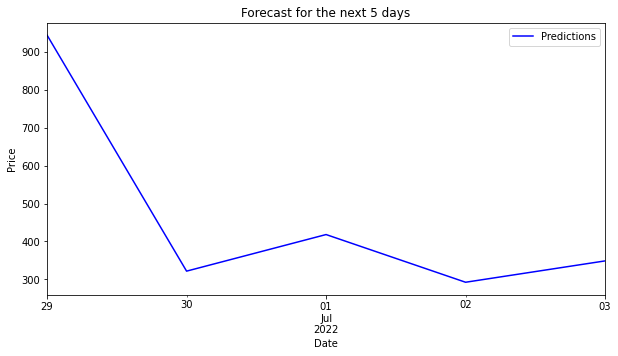

In [210]:
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()